# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.16.1


In [2]:
import numpy as np

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.

In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data",
                                    "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\vipre\\.keras\\datasets\\auto-mpg.data'

In [4]:
pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep="\t")

,18.0 8 307.0 130.0 3504. 12.0 70 1,chevrolet chevelle malibu
0,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
1,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
2,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
3,17.0 8 302.0 140.0 3449. 10...,ford torino
4,15.0 8 429.0 198.0 4341. 10...,ford galaxie 500
...,...,...
392,27.0 4 140.0 86.00 2790. 15...,ford mustang gl
393,44.0 4 97.00 52.00 2130. 24...,vw pickup
394,32.0 4 135.0 84.00 2295. 11...,dodge rampage
395,28.0 4 120.0 79.00 2625. 18...,ford ranger


Importelo usando pandas.

In [5]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

In [6]:
raw_dataset = pd.read_csv(dataset_path, names = column_names, na_values='?', sep= ' ', comment = '\t', skipinitialspace = True)
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,NaN
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,NaN
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,NaN
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,NaN


In [7]:
raw_dataset = pd.read_fwf(dataset_path, names = column_names)
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


In [8]:
dataset = raw_dataset.copy()

In [9]:
dataset.shape

(398, 9)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [11]:
# describe include all

dataset.describe(include="all")

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,"""ford pinto"""
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


### Limpia los datos

Trata los missings y variables categóricas

In [12]:
# suma de los nans

dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car Name        0
dtype: int64

In [13]:
# buscar el valor anomalo en la columna Horsepower

dataset["Horsepower"]== "?"
dataset.loc[dataset["Horsepower"]== "?"]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


In [14]:
# Remplazo valores anómalos.

dataset["Horsepower"].replace("?", np.NaN, inplace= True)


C:\Users\vipre\AppData\Local\Temp\ipykernel_4500\2865846692.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Horsepower"].replace("?", np.NaN, inplace= True)


In [15]:
# Remplazo el type

dataset["Horsepower"] = dataset["Horsepower"].astype(float)

In [17]:
dataset = dataset.dropna(subset=["Horsepower"])

In [335]:
# eliminar las columnas con este valor anomalo y conviertela a float

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
 8   Car Name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [19]:
# drop car name, el name no suele ser buena columna...

dataset = dataset.drop(columns="Car Name")


In [20]:
# Lo sacamos y dejamos en una serie, son eliminar

origin = dataset.pop('Origin')

In [21]:
(origin == 1)

0       True
1       True
2       True
3       True
4       True
       ...  
393     True
394    False
395     True
396     True
397     True
Name: Origin, Length: 392, dtype: bool

In [22]:
# se puede hacer con get_dummies

dataset['USA'] = (origin == 1).astype("int")
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1

In [23]:
dataset.Cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [24]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [25]:
train_dataset = dataset.sample(frac=0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train_dataset.iloc[:, 1:], train_dataset.iloc[:, 0])

In [29]:
y_train

345    35.1
391    36.0
56     26.0
230    15.5
16     18.0
       ... 
385    38.0
376    37.0
211    16.5
357    32.9
289    16.9
Name: MPG, Length: 235, dtype: float64

### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

In [30]:
X_train.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

In [111]:
# columnas de train

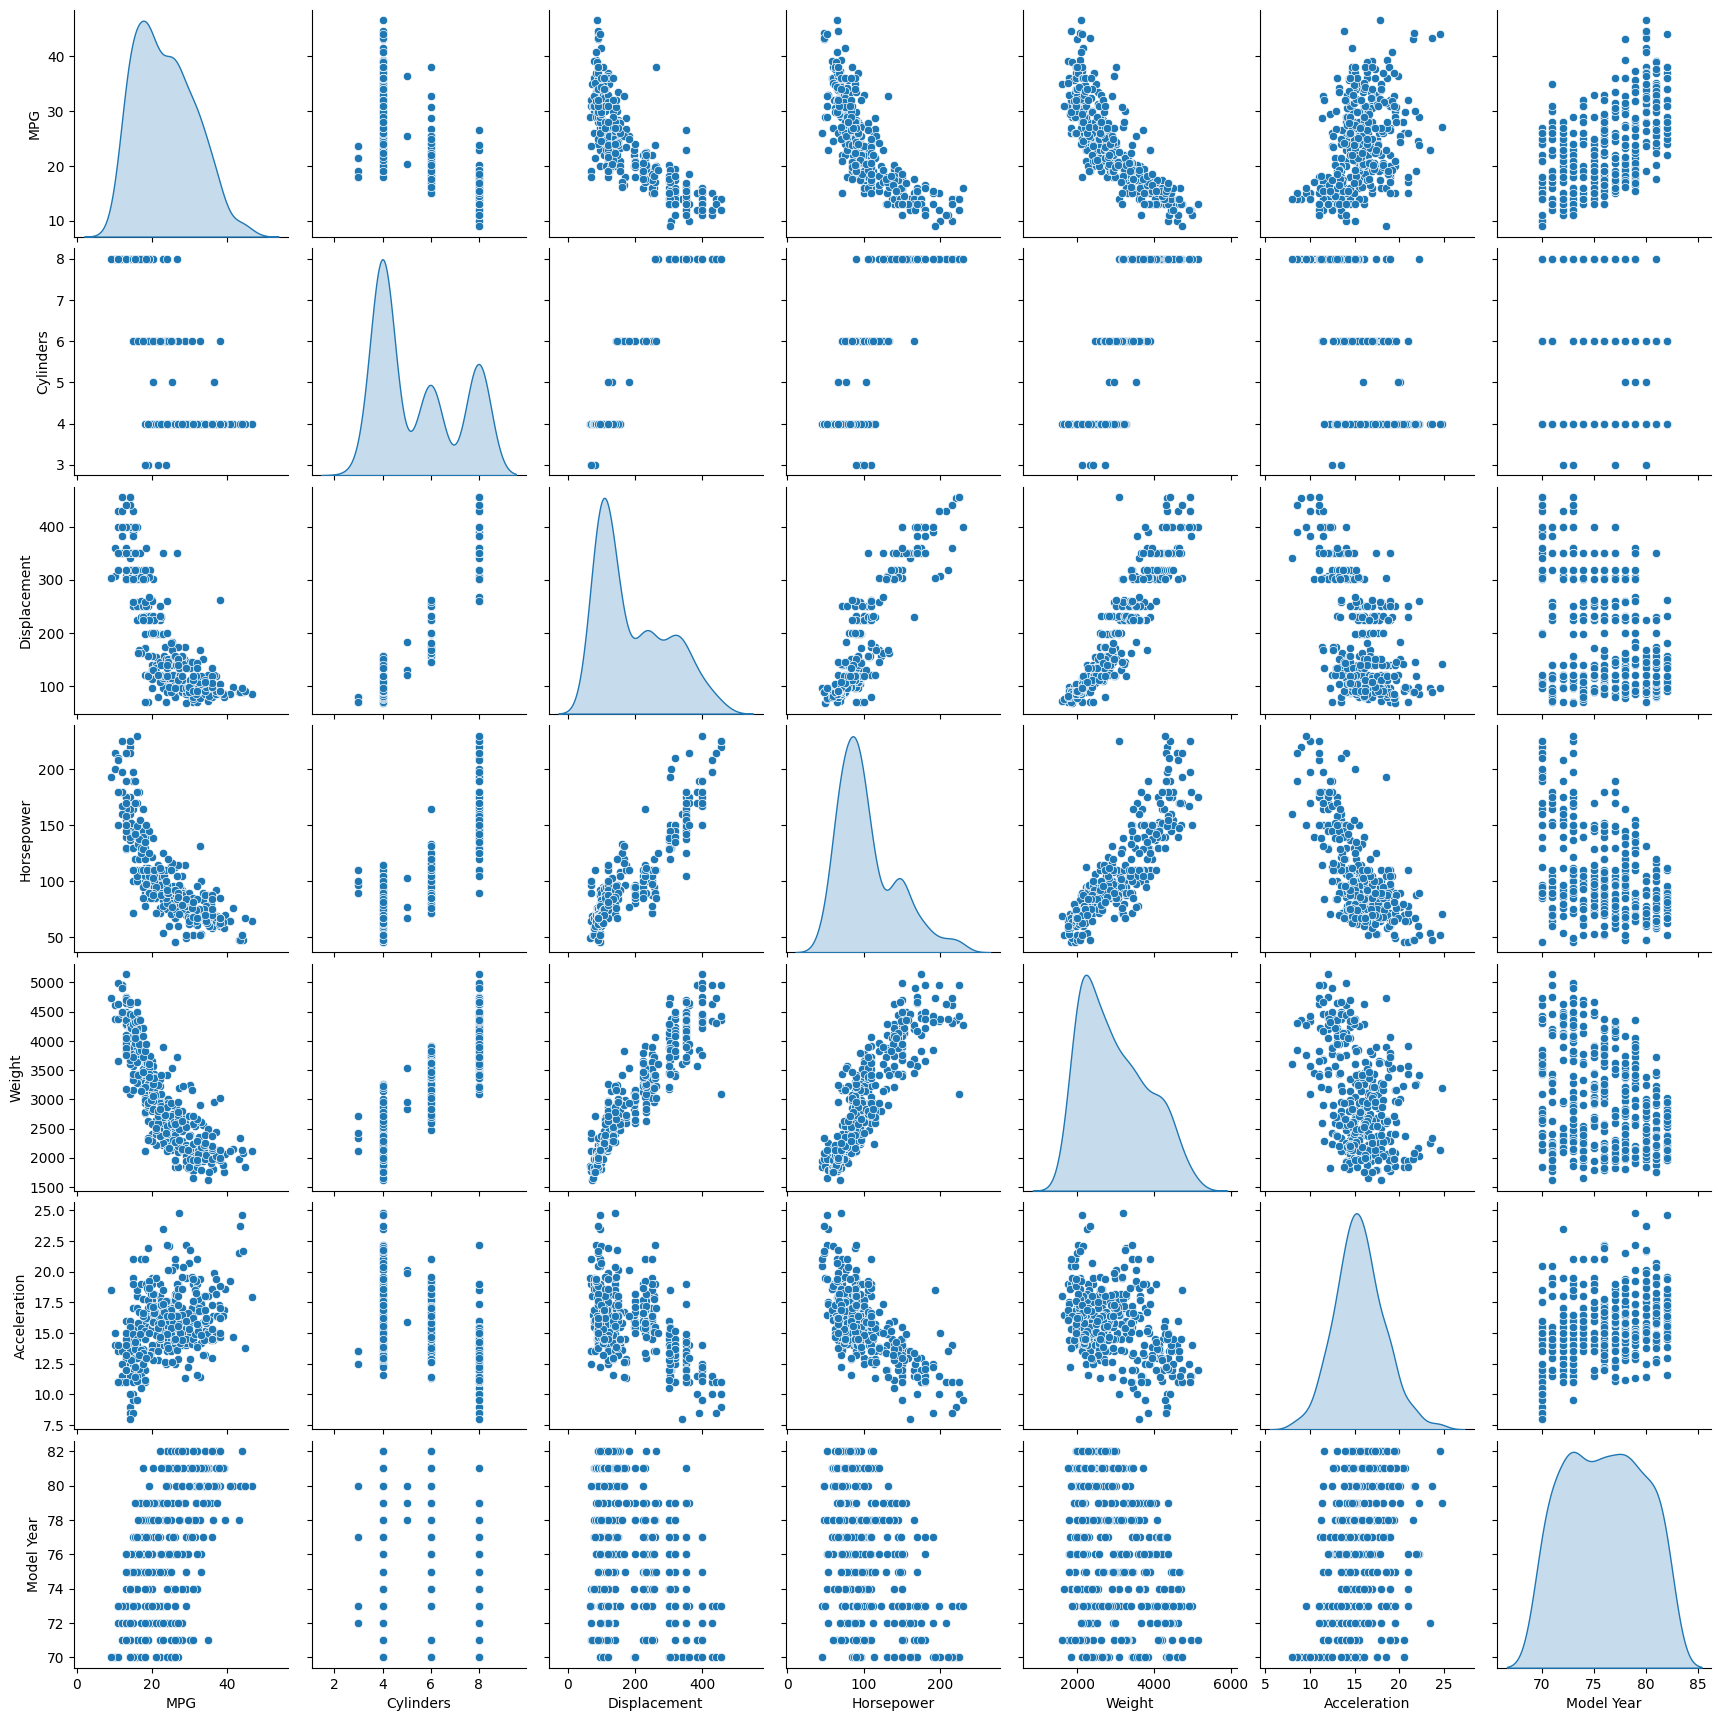

In [31]:
# pairplot , diag_kind = 'kde'

sns.pairplot(dataset.drop(columns=['USA', 'Europe', 'Japan']), diag_kind = 'kde')

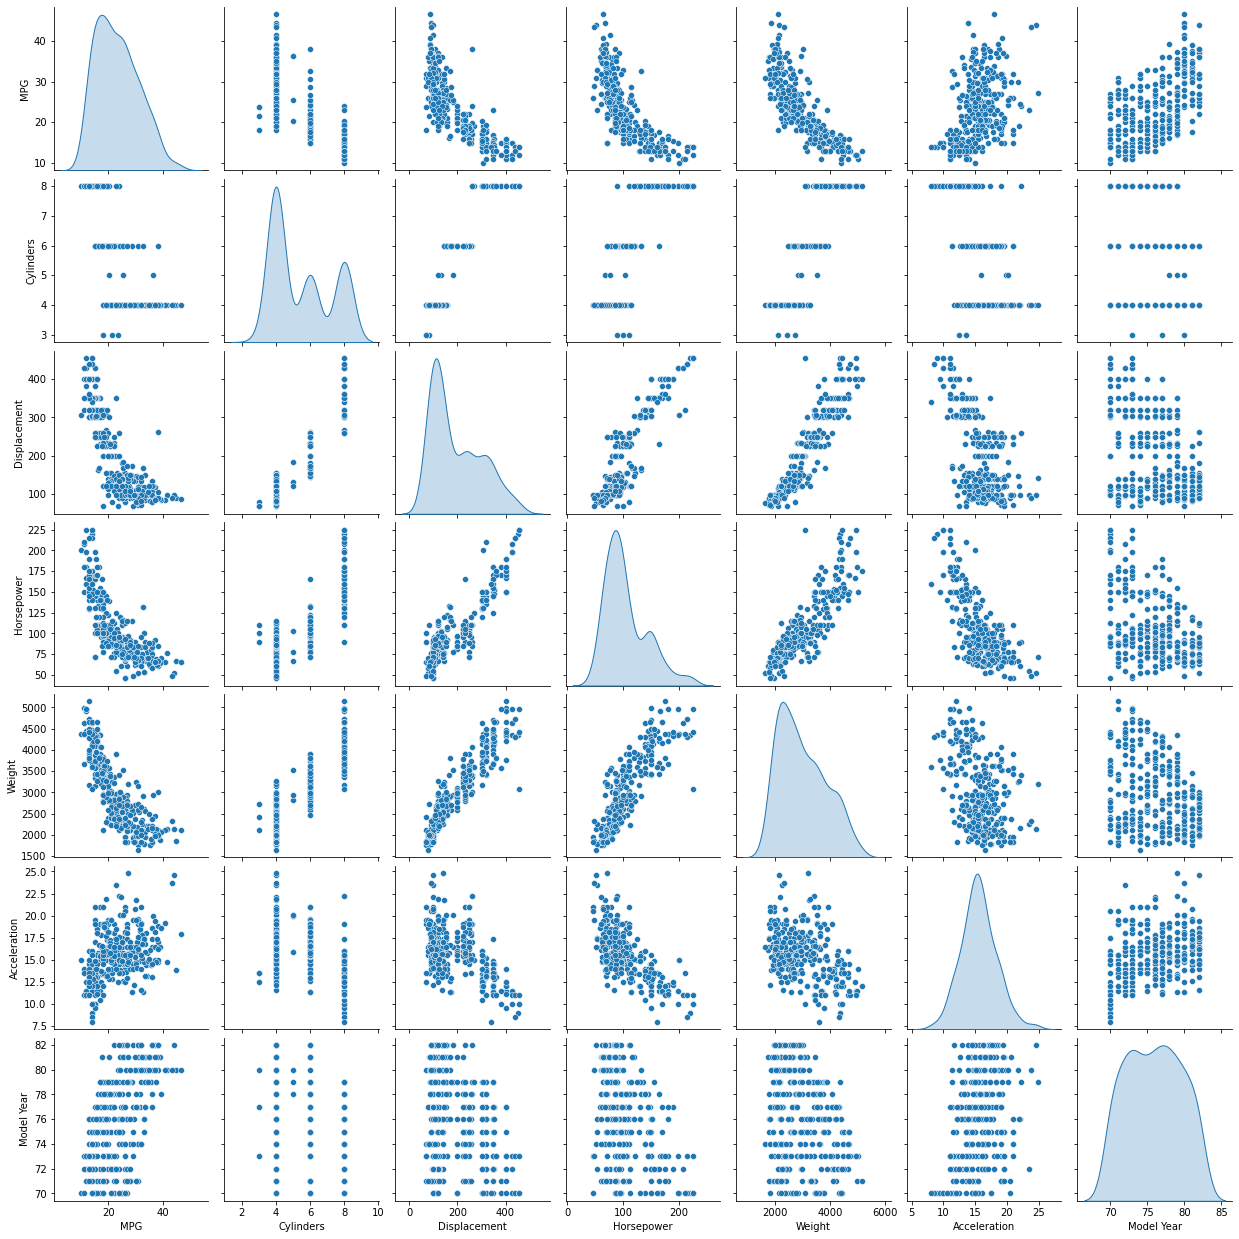

Tambien revise las estadisticas generales:

In [33]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [34]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


### Separa las features del target

Separe el target de las features.

In [35]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [36]:
train_dataset.select_dtypes("number")

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,4,90.0,75.0,2125.0,14.5,74,1,0,0
282,4,140.0,88.0,2890.0,17.3,79,1,0,0
69,8,350.0,160.0,4456.0,13.5,72,1,0,0
378,4,105.0,63.0,2125.0,14.7,82,1,0,0
331,4,97.0,67.0,2145.0,18.0,80,0,0,1
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,1,0,0
229,8,400.0,180.0,4220.0,11.1,77,1,0,0
150,4,108.0,93.0,2391.0,15.5,74,0,0,1
145,4,83.0,61.0,2003.0,19.0,74,0,0,1


In [37]:
def norm(x):
    return (x - train_stats['mean'])/train_stats['std']

from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()
st_scaler.fit(train_dataset)

normed_train_data = st_scaler.transform(train_dataset)
normed_test_data = st_scaler.transform(test_dataset)

#normed_train_data = norm(train_dataset)
#normed_test_data = norm(test_dataset)

print(normed_train_data.shape)
print(normed_test_data.shape)

# Podemos utilizar scalados de sklearn

(314, 9)
(78, 9)


In [38]:
normed_train_data

array([[-0.87073567, -1.01107037, -0.78530384, ...,  0.77591289,
        -0.46589083, -0.49601587],
       [-0.87073567, -0.53106418, -0.44351791, ...,  0.77591289,
        -0.46589083, -0.49601587],
       [ 1.48625572,  1.48496183,  1.44945034, ...,  0.77591289,
        -0.46589083, -0.49601587],
       ...,
       [-0.87073567, -0.83826814, -0.31206178, ..., -1.28880447,
        -0.46589083,  2.01606452],
       [-0.87073567, -1.07827123, -1.153381  , ..., -1.28880447,
        -0.46589083,  2.01606452],
       [-0.87073567, -0.84786826, -0.49610036, ..., -1.28880447,
         2.1464256 , -0.49601587]])

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [40]:
pd.DataFrame(data= normed_train_data, columns= X_train.columns)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,-0.870736,-1.011070,-0.785304,-1.026939,-0.380365,-0.517221,0.775913,-0.465891,-0.496016
1,-0.870736,-0.531064,-0.443518,-0.118985,0.625098,0.845257,0.775913,-0.465891,-0.496016
2,1.486256,1.484962,1.449450,1.739650,-0.739460,-1.062212,0.775913,-0.465891,-0.496016
3,-0.870736,-0.867069,-1.100799,-1.026939,-0.308547,1.662743,0.775913,-0.465891,-0.496016
4,-0.870736,-0.943870,-0.995634,-1.003202,0.876464,1.117752,-1.288804,-0.465891,2.016065
...,...,...,...,...,...,...,...,...,...
309,0.307760,0.044943,-0.522392,-0.000299,0.948283,0.845257,0.775913,-0.465891,-0.496016
310,1.486256,1.964968,1.975275,1.459549,-1.601286,0.300266,0.775913,-0.465891,-0.496016
311,-0.870736,-0.838268,-0.312062,-0.711232,-0.021271,-0.517221,-1.288804,-0.465891,2.016065
312,-0.870736,-1.078271,-1.153381,-1.171737,1.235558,-0.517221,-1.288804,-0.465891,2.016065


In [32]:
normed_train_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852
...,...,...,...,...,...,...,...,...,...
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852


In [41]:
normed_train_data.shape

(314, 9)

In [42]:
normed_train_data.shape

(314, 9)

In [ ]:
# modelo secuencial

# dos capas con 64 y una densa de salida para regresion

# compilamos con mse, adam y metricas mae y mse

In [375]:
model = keras.models.Sequential()


model.add(keras.layers.Dense(units=64, activation='relu', input_shape=(9)))

model.add(keras.layers.Dense(units=64, activation='relu'))

# Salida
model.add(keras.layers.Dense(units=1))

In [377]:
model.compile(
        loss='mean_squared_error',
        optimizer=tf.keras.optimizers.RMSprop(0.001),
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [378]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [379]:
# model fit
# con normed_train_data y train_labels, epocas 1000, validation_split 0.2

history = model.fit(
    normed_train_data, 
    train_labels,
    epochs=1000,
    validation_split=0.2)



Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 572.0137 - mean_absolute_error: 22.7332 - mean_squared_error: 572.0137 - val_loss: 549.0071 - val_mean_absolute_error: 22.1780 - val_mean_squared_error: 549.0071
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 506.3172 - mean_absolute_error: 21.2622 - mean_squared_error: 506.3172 - val_loss: 493.5955 - val_mean_absolute_error: 20.9374 - val_mean_squared_error: 493.5955
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 467.5799 - mean_absolute_error: 20.3563 - mean_squared_error: 467.5799 - val_loss: 433.1787 - val_mean_absolute_error: 19.5001 - val_mean_squared_error: 433.1787
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 422.7419 - mean_absolute_error: 19.1988 - mean_squared_error: 422.7419 - val_loss: 368.9519 - val_mean_absolute_error: 17.8512 - val_mean_squared_error: 368.9519
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 325.8629 - mean_absolute_error: 16.7757 - mean_squared_error:

In [380]:
df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = history.epoch
df_hist

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,561.989197,22.471035,561.989197,549.007080,22.178019,549.007080,0
1,506.639191,21.262634,506.639191,493.595490,20.937372,493.595490,1
2,454.389160,20.042654,454.389160,433.178680,19.500149,433.178680,2
3,397.312500,18.618822,397.312500,368.951874,17.851236,368.951874,3
4,337.380890,17.021280,337.380890,303.498352,16.003944,303.498352,4
...,...,...,...,...,...,...,...
995,1.982186,0.940243,1.982186,8.404374,2.162786,8.404374,995
996,2.226850,0.973709,2.226850,8.807503,2.106057,8.807503,996
997,2.091639,0.944188,2.091639,8.100670,2.070678,8.100670,997
998,1.868575,0.916358,1.868575,9.297680,2.345465,9.297680,998


Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [381]:
df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = history.epoch
df_hist

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,561.989197,22.471035,561.989197,549.007080,22.178019,549.007080,0
1,506.639191,21.262634,506.639191,493.595490,20.937372,493.595490,1
2,454.389160,20.042654,454.389160,433.178680,19.500149,433.178680,2
3,397.312500,18.618822,397.312500,368.951874,17.851236,368.951874,3
4,337.380890,17.021280,337.380890,303.498352,16.003944,303.498352,4
...,...,...,...,...,...,...,...
995,1.982186,0.940243,1.982186,8.404374,2.162786,8.404374,995
996,2.226850,0.973709,2.226850,8.807503,2.106057,8.807503,996
997,2.091639,0.944188,2.091639,8.100670,2.070678,8.100670,997
998,1.868575,0.916358,1.868575,9.297680,2.345465,9.297680,998


In [382]:
df_hist.head(50)

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,561.989197,22.471035,561.989197,549.007080,22.178019,549.007080,0
1,506.639191,21.262634,506.639191,493.595490,20.937372,493.595490,1
2,454.389160,20.042654,454.389160,433.178680,19.500149,433.178680,2
3,397.312500,18.618822,397.312500,368.951874,17.851236,368.951874,3
4,337.380890,17.021280,337.380890,303.498352,16.003944,303.498352,4
5,277.888306,15.253933,277.888306,240.540817,14.015600,240.540817,5
6,220.673584,13.322047,220.673584,182.380554,11.945476,182.380554,6
7,168.928192,11.395380,168.928192,132.351105,9.956231,132.351105,7
8,124.970520,9.535066,124.970512,92.337181,8.078292,92.337181,8
9,91.145966,7.764703,91.145966,65.578247,6.699522,65.578247,9


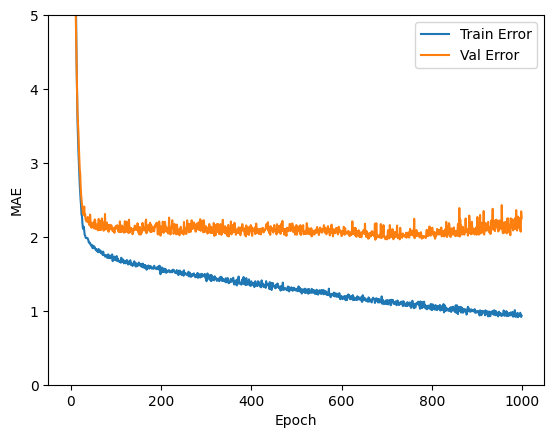

In [384]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(df_hist['epoch'], df_hist['mean_absolute_error'], label=['Train Error'] )
plt.plot(df_hist['epoch'], df_hist['val_mean_absolute_error'], label=['Val Error'] )
plt.ylim([0,5])

plt.legend()

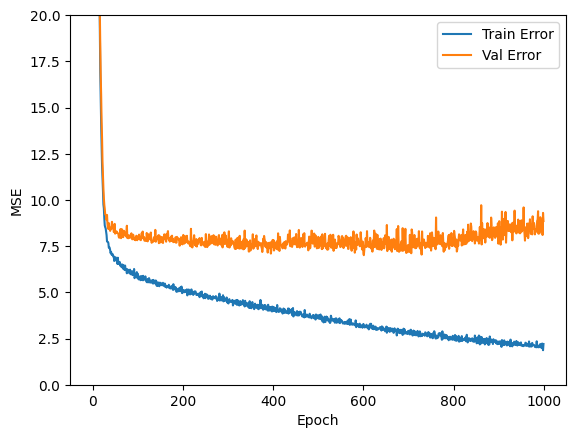

In [385]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(df_hist['epoch'], df_hist['mean_squared_error'], label=['Train Error'] )
plt.plot(df_hist['epoch'], df_hist['val_mean_squared_error'], label=['Val Error'] )
plt.ylim([0,20])
plt.legend()

In [386]:
def plot_history(history, ylim1=(0,20), ylim2=(0,20)):
    df_hist = pd.DataFrame(history.history)
    df_hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(df_hist['epoch'], df_hist['mean_absolute_error'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mean_absolute_error'], label=['Val Error'] )
    plt.ylim(ylim1)
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(df_hist['epoch'], df_hist['mean_squared_error'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mean_squared_error'], label=['Val Error'] )
    plt.ylim(ylim2)
    plt.legend()

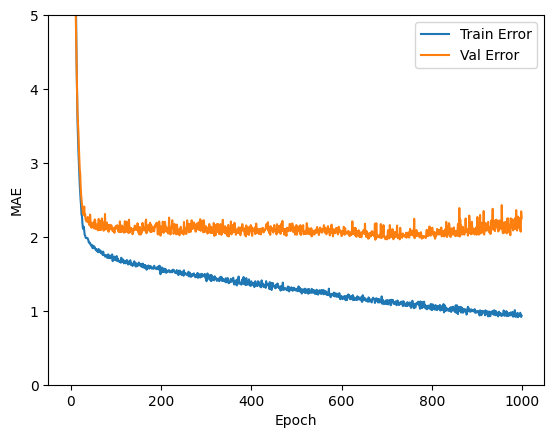

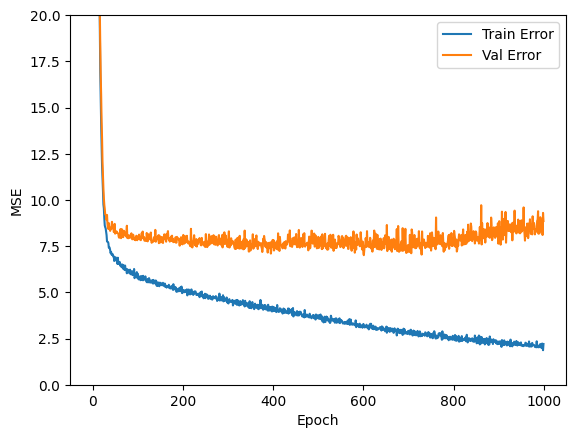

In [387]:
plot_history(history, ylim1 = (0,5))

¿Alguna conclusión respecto a este gráfico?

# BONUS TRACK!!
Investigadme esto

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Después del entrenamiento utiliza la función del apartado anterior `plot_history(history)`.

In [43]:
history = model.fit(
    normed_train_data, 
    train_labels,
    epochs=1000,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])



NameError: name 'model' is not defined

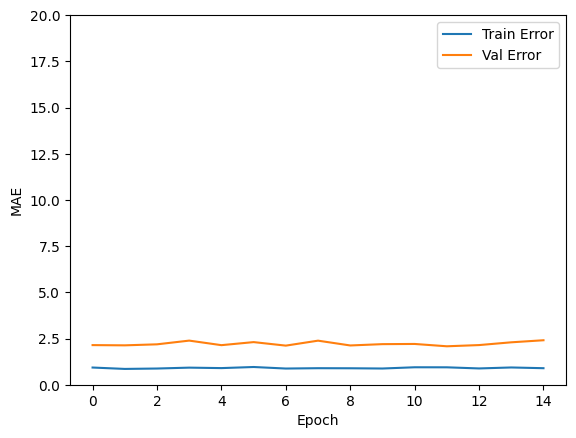

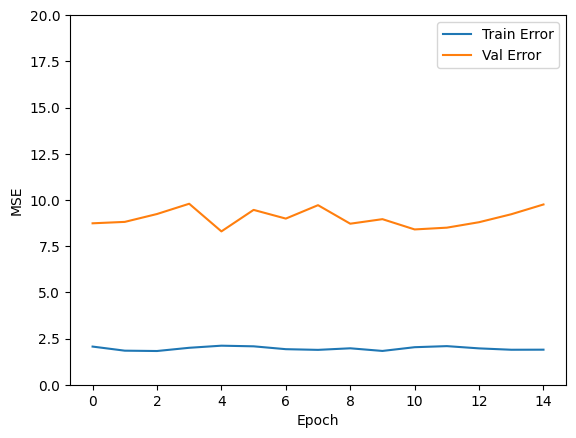

In [393]:
plot_history(history)

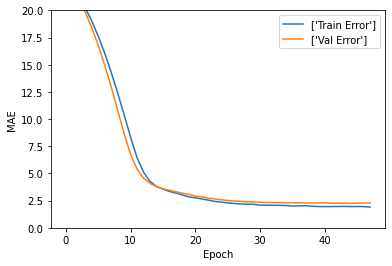

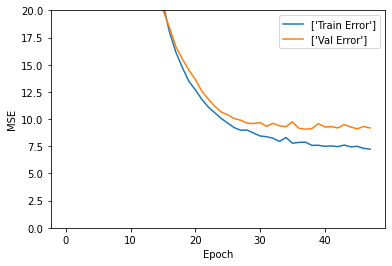

In [52]:
# HAY QUE REPETIR EL MODELO PERO CON EARLY STOPPING Y  PATIENCE 10
# [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
plot_history(history)

# SE ACABO EL BONUS TRACK, ESTO SI!!!

Interpreta el gráfico

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [394]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels)
mae

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3814 - mean_absolute_error: 2.0327 - mean_squared_error: 7.3814 


2.077918767929077

In [53]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels)
mae

3/3 [==============================] - 0s 7ms/step - loss: 5.8860 - mae: 1.8805 - mse: 5.8860


1.8805148601531982

In [54]:
from sklearn.metrics import r2_score

In [56]:
r2_score(test_labels, model.predict(normed_test_data))

3/3 [==============================] - 0s 16ms/step


0.9098707930246225

In [57]:
model.save("my_keras_model_MAE_1_96.h5")

Ahora prueba el modelo. Coge 10 ejemplos de train y llama a` model.predict`.

In [58]:
result_10 = model.predict(normed_train_data[:10])
result_10

1/1 [==============================] - 0s 48ms/step


array([[28.6878  ],
       [23.859838],
       [12.288491],
       [37.891945],
       [35.145065],
       [20.377728],
       [37.250618],
       [30.458727],
       [18.288368],
       [25.042332]], dtype=float32)

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 [==============================] - 0s 17ms/step


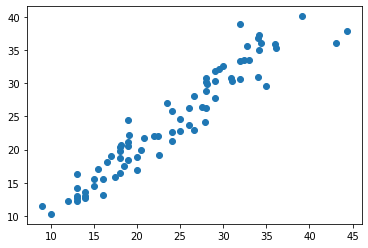

In [59]:
test_predictions = # PREDICCIONES CON norm_test_data
plt.scatter(test_labels, test_predictions)

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

(array([ 2.,  1.,  5.,  7., 21., 15., 17.,  8.,  1.,  1.]),
 array([-7.08172379, -5.68148064, -4.28123749, -2.88099434, -1.48075119,
        -0.08050804,  1.31973511,  2.71997826,  4.12022141,  5.52046455,
         6.9207077 ]),
 <BarContainer object of 10 artists>)

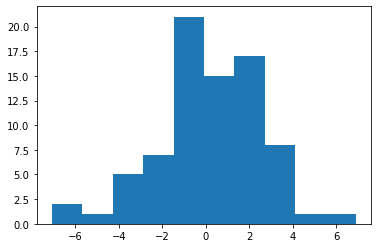

In [60]:
error = test_predictions - test_labels

plt.hist(error)

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

## Conclusion

Este cuaderno introdujo algunas técnicas para manejar un problema de regresión.

* El error cuadrático medio (MSE) es una función de pérdida común utilizada para problemas de regresión (se utilizan diferentes funciones de pérdida para problemas de clasificación).
* Del mismo modo, las métricas de evaluación utilizadas para la regresión difieren de la clasificación. Una métrica de regresión común es el error absoluto medio (MAE).
* Cuando las características de datos de entrada numéricos tienen valores con diferentes rangos, cada característica debe escalarse independientemente al mismo rango.
* Si no hay muchos datos de entrenamiento, una técnica es preferir una red pequeña con pocas capas ocultas para evitar el sobreajuste.
* La detención temprana es una técnica útil para evitar el sobreajuste.

In [58]:
model_loaded = keras.models.load_model("my_keras_model_MAE_1_96.h5")

test_predictions = model_loaded.predict(normed_test_data).flatten()

In [59]:
test_predictions

array([15.724552 , 11.683048 , 12.47341  , 23.602165 , 21.050465 ,
       13.462151 , 13.192361 , 13.379283 , 19.690887 , 30.02945  ,
       25.153633 , 24.985764 , 14.308925 , 25.710617 , 12.290881 ,
       13.581768 , 14.205824 , 13.1787195, 18.890953 , 12.687322 ,
       12.934426 , 25.826237 , 19.114384 , 20.23384  , 30.077175 ,
       23.496483 , 15.980178 , 23.140163 , 16.474903 , 20.652336 ,
       28.213821 , 21.355206 , 18.866337 , 21.765427 , 26.150589 ,
       15.740327 , 19.379036 , 32.69873  , 30.529648 , 17.15385  ,
       31.238178 , 29.412548 , 15.778153 , 35.69676  , 34.388645 ,
       35.85762  , 20.508686 , 22.531406 , 20.841087 , 26.521431 ,
       30.363766 , 19.66843  , 32.53331  , 18.567234 , 17.504608 ,
       17.673996 , 33.953976 , 35.18694  , 22.246986 , 24.395443 ,
       38.045296 , 33.432056 , 28.231087 , 28.207329 , 32.5648   ,
       39.756073 , 37.1423   , 36.268513 , 34.033016 , 29.40741  ,
       22.342922 , 21.964573 , 29.8344   , 31.03479  , 36.1142